In [1]:
import numpy as np

import keras


Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

(pics, labels), _ = cifar10.load_data()

## LET'S GET THE IMAGES READY

In [3]:
print(pics.shape)

(50000, 32, 32, 3)


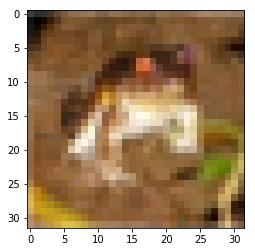

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(pics[0])

In [5]:
pics[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ..., 
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ..., 
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ..., 
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ..., 
       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ..., 
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ..., 
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ..., 
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,

In [6]:
pics = pics.astype('float32')
pics /= 255
pics.shape

(50000, 32, 32, 3)

In [7]:
pics[0]

array([[[ 0.23137255,  0.24313726,  0.24705882],
        [ 0.16862746,  0.18039216,  0.17647059],
        [ 0.19607843,  0.1882353 ,  0.16862746],
        ..., 
        [ 0.61960787,  0.51764709,  0.42352942],
        [ 0.59607846,  0.49019608,  0.40000001],
        [ 0.58039218,  0.48627451,  0.40392157]],

       [[ 0.0627451 ,  0.07843138,  0.07843138],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.07058824,  0.03137255,  0.        ],
        ..., 
        [ 0.48235294,  0.34509805,  0.21568628],
        [ 0.46666667,  0.32549021,  0.19607843],
        [ 0.47843137,  0.34117648,  0.22352941]],

       [[ 0.09803922,  0.09411765,  0.08235294],
        [ 0.0627451 ,  0.02745098,  0.        ],
        [ 0.19215687,  0.10588235,  0.03137255],
        ..., 
        [ 0.4627451 ,  0.32941177,  0.19607843],
        [ 0.47058824,  0.32941177,  0.19607843],
        [ 0.42745098,  0.28627452,  0.16470589]],

       ..., 
       [[ 0.81568629,  0.66666669,  0.3764706 ],
        

## NOW LET'S GET OUR LABELS PREPARED

In [8]:
print(labels[0])

[6]


The CIFAR database has labels for 10 different categories. Let's create a lookup so that we can match the labels with more human readable text.

In [9]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

number_of_classes = len(class_names)

word_label = class_names[ int(labels[0]) ]
print(word_label)

frog


Now that we have a way of getting our labels into human readable format, let's one_hot_enocode these labels so that they can be used by the A.I. for training.

In [10]:
labels = keras.utils.to_categorical(labels, number_of_classes)
print(labels[0])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [11]:
def labelToText(_label):
    print(class_names[np.argmax(_label)])
    
labelToText(labels[0])

frog


# BUILDING OUR MODEL

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, Flatten
# adding some additional features...
from keras.layers import MaxPooling2D, Dropout

# THIS TELLS KERAS WE WILL BE ADDING LAYERS IN ORDER
model = Sequential()

# OUR FIRST COLLECTION OF LAYERS
model.add( Conv2D(48, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu' ))
model.add( Conv2D(48, (3,3), activation='relu' ))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add( Dropout(0.25))

# SECOND LAYER, SAME AS FIRST EXCEPT FOR TWICE THE FEATURE MAPS
model.add( Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add( Conv2D(96, (3,3), activation='relu' ))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add( Dropout(0.25))

# ONE MORE TIME, DOUBLED AGAIN...
model.add( Conv2D(192, (3, 3), padding='same', activation='relu'))
model.add( Conv2D(192, (3,3), activation='relu' ))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add( Dropout(0.25))

# NOW LET'S START FORCING THE MODEL TO CONVERGE ON 1 of !0 CLASS NAMES
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

# OUR MODEL IS FINISHED. LET'S TELL KERAS TO COMPILE IT
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
batch_size = 128

def TrainingLoop(number_of_epochs):
    model.fit(pics, labels, \
              batch_size=batch_size, \
              epochs=number_of_epochs, \
              verbose=1, \
              validation_split=.1 )
    
TrainingLoop(1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/1
45000/45000 [==============================] - 25s 550us/step - loss: 1.8852 - acc: 0.2722 - val_loss: 1.4462 - val_acc: 0.4694


# TESTING OUR MODEL

In [14]:
test_image = pics[30]
test_image.shape

(32, 32, 3)

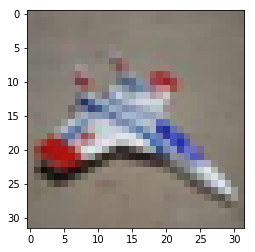

In [15]:
plt.imshow(test_image)

In [16]:
test_image_batch = np.expand_dims(test_image, axis=0)
test_image_batch.shape

(1, 32, 32, 3)

In [17]:
result = model.predict(test_image_batch, batch_size=1, verbose=1)
print(result)

1/1 [==============================] - 0s 71ms/step
[[ 0.21419773  0.24433167  0.03350829  0.01116295  0.02244099  0.00662247
   0.01248895  0.00691097  0.33798772  0.11034828]]


In [18]:
print( class_names[np.argmax(result, axis=1)[0]] )

ship


# WE NEED A LOT MORE TRAINING...

But our computers are a bit too slow. Let's figure out how to load 'pre-trained weights' into our model.

First, let's see what I did previously (on a much faster computer with external GPU) after I loaded this Jupyter Notebook and ran TrainingLoop(10). Once I felt the A.I. model had increased in accuracy to an acceptable degree, I saved the trained weights like this:


In [19]:
# I'm commenting this out so you don't overwrite the file on your copy!
#model.save_weights('cifar_cnn_weights_final.h5')

Assuming you have code for instantiating your model, you can then load the weights you saved from one computer running this notebook, into a model with the same architecture on a different computer, by sharing the weights file and doing this:

In [20]:
model.load_weights('cifar_cnn_weights_final.h5')

Now let's test it again, with the weights we've trained over time on a faster system.

1/1 [==============================] - 0s 4ms/step
------------------------------------------
airplane


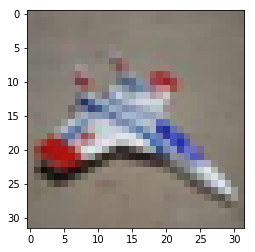

In [21]:

test_image = pics[30]

test_image_batch = np.expand_dims(test_image, axis=0)
result = model.predict(test_image_batch, batch_size=1, verbose=1)

print("------------------------------------------")
print( class_names[np.argmax(result, axis=1)[0]] )
plt.imshow(test_image)

We will use this technique of loading in pre-trained weights for a future project, where the training time would be significant and computationally expensive.